In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
# The code was removed by Watson Studio for sharing.

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
0,2001,0.58,0.74,4,215,3,0,0,sales,low,No
1,2002,0.82,0.67,2,202,3,0,0,sales,low,No
2,2003,0.45,0.69,5,193,3,0,0,sales,low,No
3,2004,0.78,0.82,5,247,3,0,0,sales,low,No
4,2005,0.49,0.60,3,214,2,0,0,sales,low,No


In [4]:
df['Attrition'] = df['Attrition'].astype('category')
df['dept'] = df['dept'].astype('category')
df['salary'] = df['salary'].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
Emp ID                   14999 non-null int64
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
dept                     14999 non-null category
salary                   14999 non-null category
Attrition                14999 non-null category
dtypes: category(3), float64(2), int64(6)
memory usage: 982.0 KB


In [5]:
df['salary'] = df['salary'].cat.codes
df['dept'] = df['dept'].cat.codes
df['Attrition'] = df['Attrition'].cat.codes
df.head()
df.shape

(14999, 11)

In [6]:
cdf = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','dept','salary','Attrition']]
cdf.head(9)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
0,0.58,0.74,4,215,3,0,0,7,1,0
1,0.82,0.67,2,202,3,0,0,7,1,0
2,0.45,0.69,5,193,3,0,0,7,1,0
3,0.78,0.82,5,247,3,0,0,7,1,0
4,0.49,0.60,3,214,2,0,0,7,1,0
5,0.36,0.95,3,206,4,0,0,7,1,0
6,0.54,0.37,2,176,2,0,0,7,1,0
7,0.99,0.91,5,136,4,0,0,7,1,0
8,0.50,0.75,6,127,3,0,0,7,1,0


In [7]:
df = cdf.sample(frac=1).reset_index(drop=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Attrition
0,0.43,0.46,2,149,3,0,0,9,2,1
1,0.75,0.78,2,259,3,0,0,6,1,0
2,0.75,0.59,5,206,2,0,0,5,1,0
3,0.56,0.84,4,143,4,0,0,7,2,0
4,0.71,0.76,3,201,2,0,0,1,2,0


In [37]:
df.shape

(14999, 10)

In [40]:
X=df.values[:,0:9]
y=df.values[:,9]
df.plot(kind='pie')


SyntaxError: positional argument follows keyword argument (<ipython-input-40-592dd21d86ad>, line 3)

In [14]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:9]

array([[-7.35386472e-01, -1.49624121e+00, -1.46286291e+00,
        -1.04222751e+00, -3.41235163e-01, -4.11165293e-01,
        -1.47411822e-01,  1.09090722e+00,  1.04300352e+00],
       [ 5.51706115e-01,  3.73317299e-01, -1.46286291e+00,
         1.16035240e+00, -3.41235163e-01, -4.11165293e-01,
        -1.47411822e-01,  4.51339358e-02, -5.54954582e-01],
       [ 5.51706115e-01, -7.36733068e-01,  9.71112924e-01,
         9.91093541e-02, -1.02612560e+00, -4.11165293e-01,
        -1.47411822e-01, -3.03457157e-01, -5.54954582e-01],
       [-2.12505109e-01,  7.23859520e-01,  1.59787644e-01,
        -1.16236823e+00,  3.43655271e-01, -4.11165293e-01,
        -1.47411822e-01,  3.93725029e-01,  1.04300352e+00],
       [ 3.90819541e-01,  2.56469892e-01, -6.51537635e-01,
        -1.00791436e-03, -1.02612560e+00, -4.11165293e-01,
        -1.47411822e-01, -1.69782153e+00,  1.04300352e+00],
       [-8.96273046e-01, -1.14569899e+00, -1.46286291e+00,
        -1.44269658e+00, -3.41235163e-01, -4.111652

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (12749, 9) (12749,)
Test set: (2250, 9) (2250,)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
yhat = LR.predict(X_test)
yhat

array([0., 0., 0., ..., 0., 0., 0.])

In [27]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.76, 0.24],
       [0.83, 0.17],
       [0.83, 0.17],
       ...,
       [0.77, 0.23],
       [0.83, 0.17],
       [0.9 , 0.1 ]])

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 134  383]
 [ 112 1621]]


Confusion matrix, without normalization
[[ 134  383]
 [ 112 1621]]


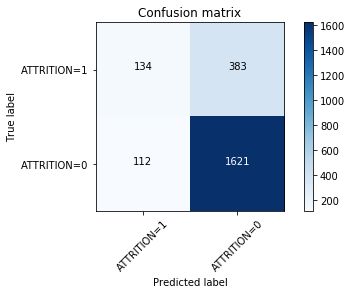

In [33]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ATTRITION=1','ATTRITION=0'],normalize= False,  title='Confusion matrix')

In [30]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87      1733
         1.0       0.54      0.26      0.35       517

   micro avg       0.78      0.78      0.78      2250
   macro avg       0.68      0.60      0.61      2250
weighted avg       0.75      0.78      0.75      2250



In [31]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.433050658194731

In [34]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.78